In [1]:
#Давидов Євген Денисович, ФІТ-4-6, Варіант 4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn. model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler

In [2]:
#Завдання 2. Визначення важливих ознак
#Завдання полягає в тому, щоб з використанням алгоритмів SVM  і  Random Forest  визначити  важливі ознаки в наборі даних. 

In [3]:
#Завантажити набір даних
columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
dataset = datasets.load_breast_cancer()
data = pd.DataFrame(dataset['data'], columns=columns)
data['cancer'] = dataset['target']

In [4]:
#Розділити дані на тренувальний та тестовий набори
X = data.drop('cancer', axis=1)  
y = data['cancer'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state = 2020, stratify=y)

In [5]:
#Застосувати випадковий ліс для визначення важливих ознак
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

RFcl = RandomForestClassifier()
RFcl.fit(X_train_scaled, y_train)
display(RFcl.score(X_train_scaled, y_train))

feats = {}
for feature, importance in zip(data.columns, RFcl.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})

1.0

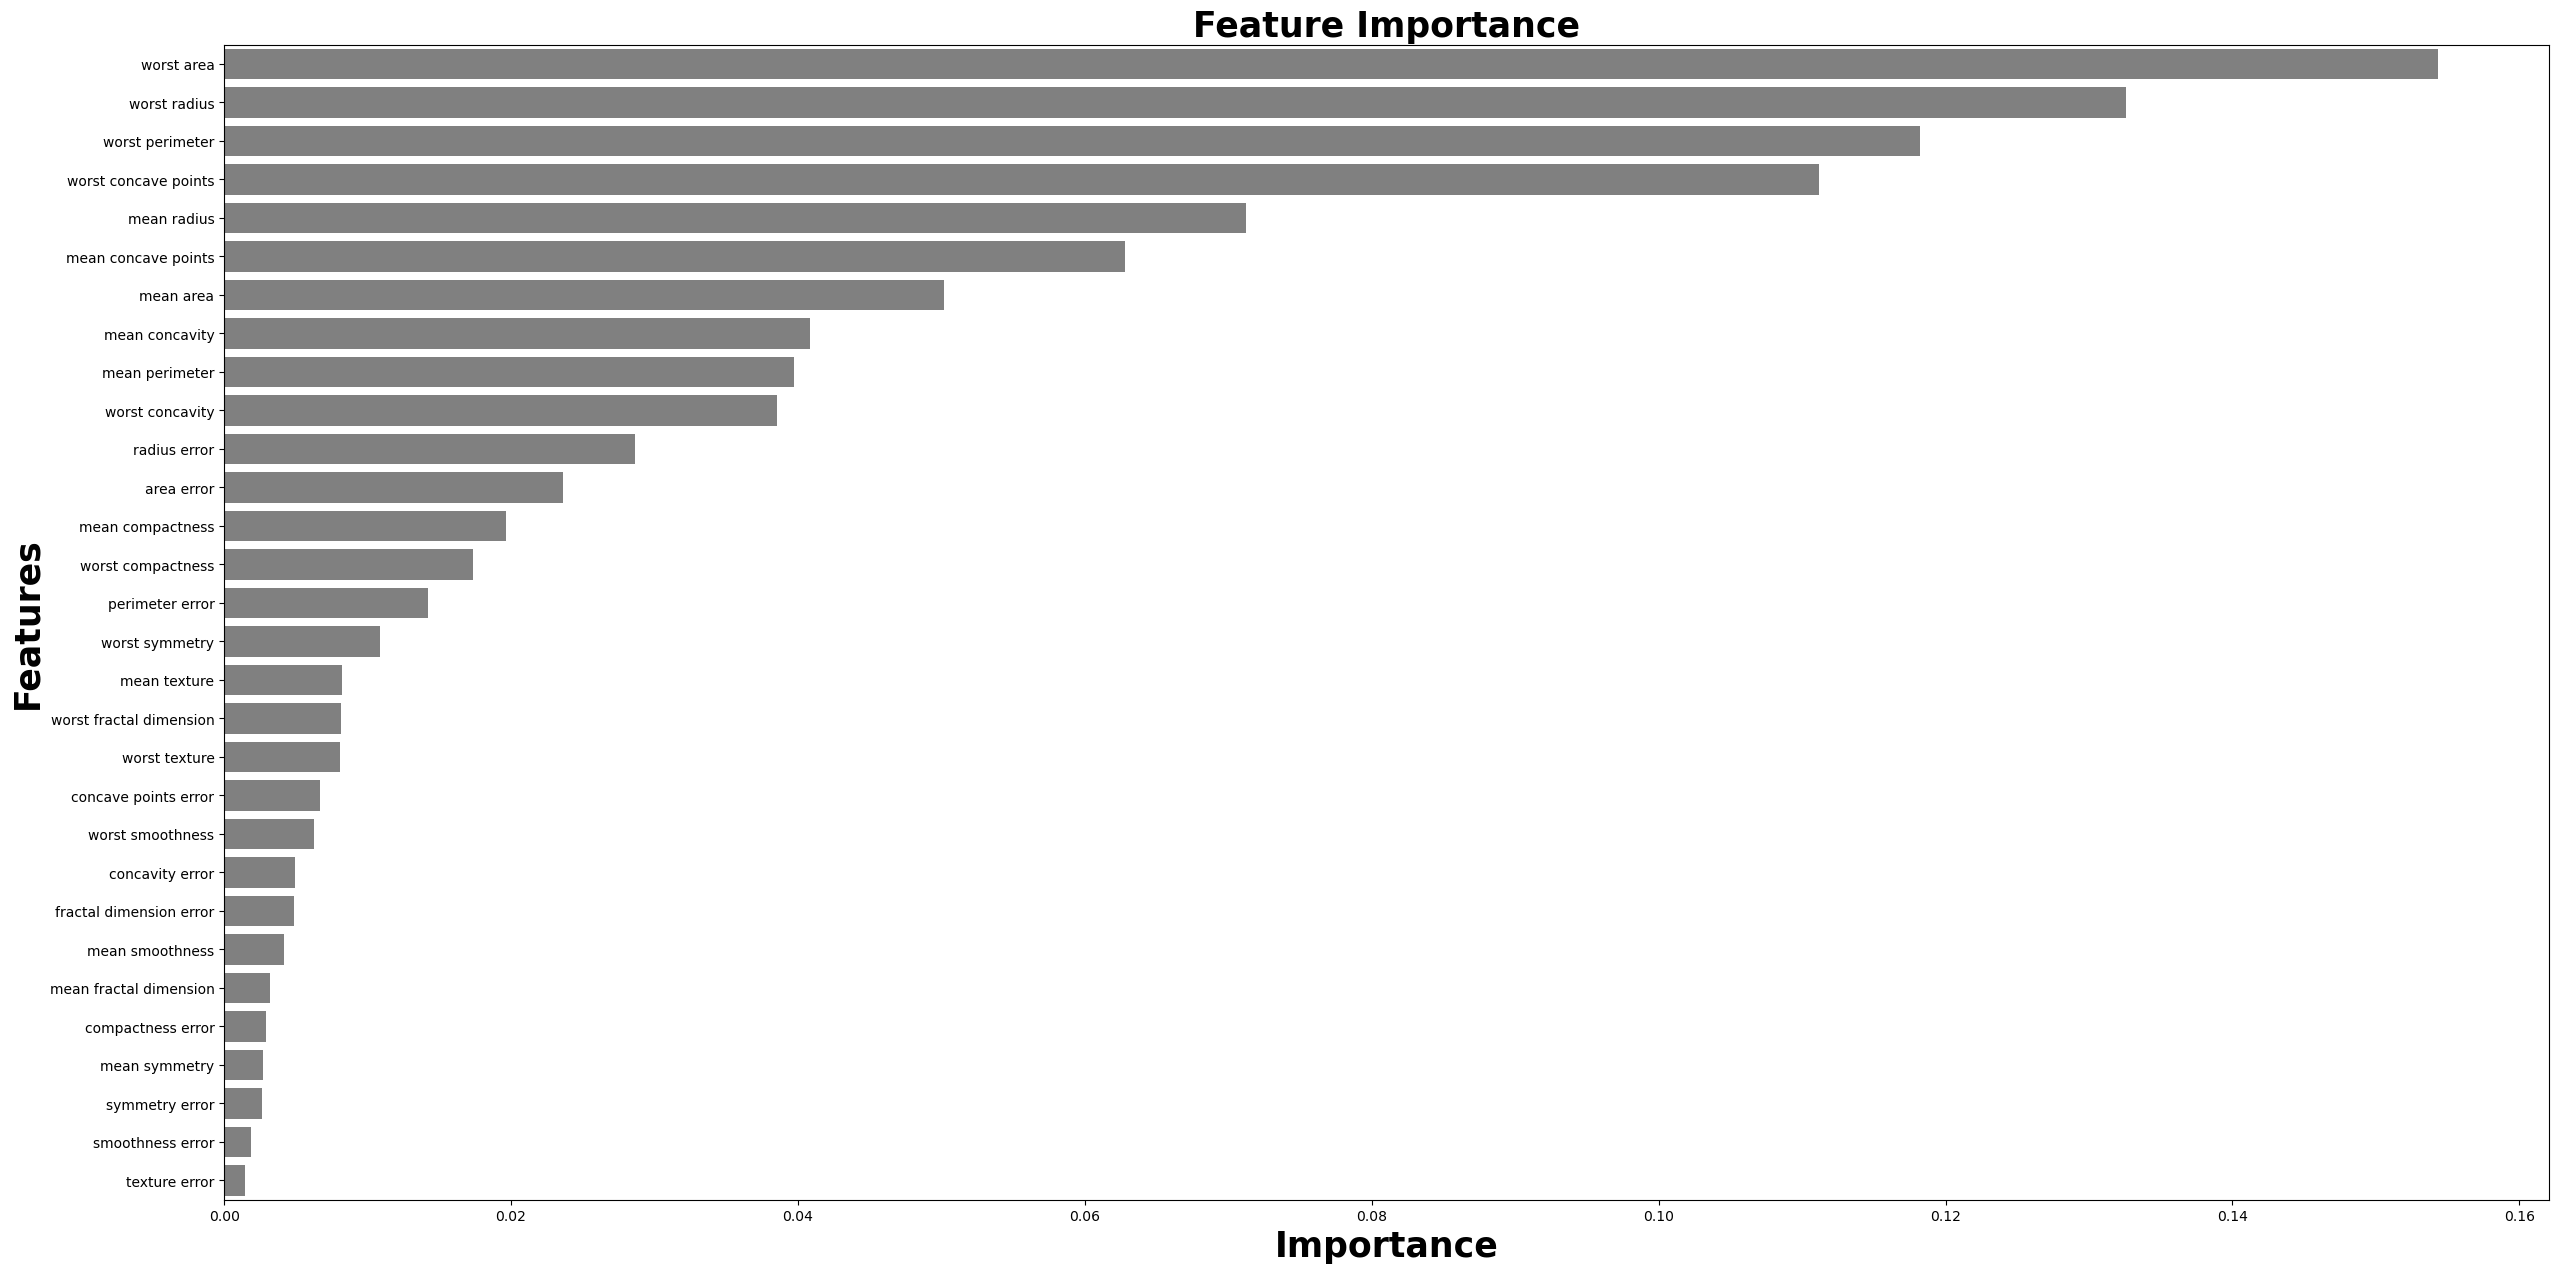

None

,Features,Gini-Importance
0,worst area,0.154356
1,worst radius,0.132570
2,worst perimeter,0.118202
3,worst concave points,0.111206
4,mean radius,0.071202
5,mean concave points,0.062792
6,mean area,0.050147
7,mean concavity,0.040865
8,mean perimeter,0.039755
9,worst concavity,0.038534


In [6]:
#Побудувати графік або таблицю, щоб показати важливість кожної ознаки в аналізі
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='grey')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

In [7]:
#Обговорити результати та визначити, які ознаки найбільше впливають на вихідні дані
#На результати більше за все впливають ознаки worst area, worst concave point, worst radius та worst perimeter
#Втім, у датасеті немає ознак, вплив яких має великий відрив від попередніх, що означає, що на вхідні дані впливають усі ознаки 

In [8]:
#Висновок: feature_importanses дозволяє зобразити вплив кожної ознаки на результати роботи алгоритму та вивести його у вигляді графіка або тексту.